In [17]:
import pandas as pd
import matplotlib as plt
import numpy



## let's do an initial loading of the data

In [ ]:
#url="https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3"
#df1=pd.read_csv(url)
file='C:/Users/fuzzy Bunny/Downloads/Fire_Department_Calls_for_Service.csv'
df1=pd.read_csv(file, nrows=10000)

In [ ]:

print (df1.columns.values)
#read_csv gave me a warning that columns 19,20,25, and 30 were mixed types
print (df1.columns[[19,20,25,30]])


In [2]:
#looks like I want to define the column types upon import
dtypes={'Call Number':'int','Unit ID':'object', 'Incident Number':'int', 
 'Call Type':'object', 'Call Date':'object',
 'Call Final Disposition':'object',
 'Address':'object', 'City':'object', 'Zipcode of Incident':'object',
 'Battalion':'object', 'Station Area':'object', 'Box':'object',
 'Original Priority':'object', 'Priority': 'object', 'Final Priority':'object',
 'ALS Unit':'bool', 'Call Type Group':'object', 'Number of Alarms' :'object',
 'Unit Type':'object', 'Unit sequence in call dispatch':'object', 
 'Fire Prevention District':'object', 'Supervisor District': 'object' ,
 'Neighborhooods - Analysis Boundaries':'object', 'Location':'object',
 'RowID':'object'}

In [47]:
#now lets re-read the file but with the data types that we want
#note that 'Location' is a tuple

file='C:/Users/fuzzy Bunny/Downloads/Fire_Department_Calls_for_Service.csv'
df1=pd.read_csv(file, dtype=dtypes, nrows=1000000 ,parse_dates=[4,5,6,7,8,9,10,11,12,14])

In [48]:
#I just use this to look at the data as I make changes to it
#normally, I'd delete it at the end
print (df1.columns.values)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
df1.head(20)
#df1[['Unit ID','Dispatch DtTm','temp_col1','Available DtTm','Next_Disp', 'Back_to_back']][:50]

['Call Number' 'Unit ID' 'Incident Number' 'Call Type' 'Call Date'
 'Watch Date' 'Received DtTm' 'Entry DtTm' 'Dispatch DtTm' 'Response DtTm'
 'On Scene DtTm' 'Transport DtTm' 'Hospital DtTm' 'Call Final Disposition'
 'Available DtTm' 'Address' 'City' 'Zipcode of Incident' 'Battalion'
 'Station Area' 'Box' 'Original Priority' 'Priority' 'Final Priority'
 'ALS Unit' 'Call Type Group' 'Number of Alarms' 'Unit Type'
 'Unit sequence in call dispatch' 'Fire Prevention District'
 'Supervisor District' 'Neighborhooods - Analysis Boundaries' 'Location'
 'RowID']


,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID
0,1030101,E18,306091,Medical Incident,2000-04-12,2000-04-12,2000-04-12 21:00:29,2000-04-12 21:01:40,2000-04-12 21:02:00,NaT,NaT,NaT,NaT,Other,NaT,2000 Block of 37TH AVE,SF,94116,B08,18,0757,3,3,3,False,NaN,1,ENGINE,1,8,4,Sunset/Parkside,"(37.7487247711275, -122.495504020186)",001030101-E18
1,1030104,M14,30612,Medical Incident,2000-04-12,2000-04-12,2000-04-12 21:09:02,2000-04-12 21:10:17,2000-04-12 21:10:29,2000-04-12 21:12:11,2000-04-12 21:19:36,2000-04-12 21:43:57,2000-04-12 22:03:33,Other,2000-04-12 22:23:57,1700 Block of 43RD AVE,SF,94122,B08,23,7651,3,3,3,True,NaN,1,MEDIC,2,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14
2,1030106,M36,30614,Medical Incident,2000-04-12,2000-04-12,2000-04-12 21:09:44,2000-04-12 21:10:56,2000-04-12 21:11:47,NaT,2000-04-12 21:14:11,2000-04-12 21:59:31,2000-04-12 22:10:06,Other,2000-04-12 22:43:40,0 Block of FELL ST,SF,94102,B02,36,3111,3,3,3,False,NaN,1,MEDIC,1,2,6,Tenderloin,"(37.7764405100838, -122.418481123408)",001030106-M36
3,1030107,E01,30615,Alarms,2000-04-12,2000-04-12,2000-04-12 21:13:47,2000-04-12 21:13:51,2000-04-12 21:14:13,2000-04-12 21:15:58,2000-04-12 21:20:12,NaT,NaT,Other,2000-04-12 21:24:19,100 Block of JONES ST,SF,94102,B03,01,1456,3,3,3,False,NaN,1,ENGINE,3,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-E01
4,1030108,RS1,30616,Medical Incident,2000-04-12,2000-04-12,2000-04-12 21:14:43,2000-04-12 21:16:11,2000-04-12 21:16:24,2000-04-12 21:18:20,2000-04-12 21:20:08,NaT,NaT,Other,2000-04-12 21:20:36,700 Block of MARKET ST,SF,94108,B03,01,1322,3,3,3,False,NaN,1,RESCUE SQUAD,2,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1
5,1030112,T03,30620,Citizen Assist / Service Call,2000-04-12,2000-04-12,2000-04-12 21:24:27,2000-04-12 21:24:54,2000-04-12 21:25:10,2000-04-12 21:27:10,2000-04-12 21:30:26,NaT,NaT,Other,2000-04-12 21:44:28,800 Block of SUTTER ST,SF,94109,B01,03,1463,3,3,3,False,NaN,1,TRUCK,1,1,3,Nob Hill,"(37.7884388430214, -122.414352343522)",001030112-T03
6,1030116,E38,30624,Electrical Hazard,2000-04-12,2000-04-12,2000-04-12 21:25:55,2000-04-12 21:28:06,2000-04-12 21:28:46,2000-04-12 21:29:59,2000-04-12 21:31:18,NaT,NaT,Other,2000-04-12 21:39:36,CALIFORNIA ST/VAN NESS AV,SF,94109,B04,38,3155,3,3,3,False,NaN,1,ENGINE,1,4,2,Nob Hill,"(37.7903696585646, -122.422328957341)",001030116-E38
7,1030117,E15,30626,Odor (Strange / Unknown),2000-04-12,2000-04-12,2000-04-12 21:27:55,2000-04-12 21:28:38,2000-04-12 21:30:27,2000-04-12 21:31:43,2000-04-12 21:34:57,NaT,NaT,Other,2000-04-12 21:38:24,2100 Block of ALEMANY BLVD,SF,94112,B09,15,8331,3,3,3,False,NaN,1,ENGINE,1,9,11,Outer Mission,"(37.7183153380753, -122.441921085449)",001030117-E15
8,1030118,E08,30625,Medical Incident,2000-04-12,2000-04-12,2000-04-12 21:27:45,2000-04-12 21:28:58,2000-04-12 21:29:21,2000-04-12 21:31:26,2000-04-12 21:32:34,NaT,NaT,Other,2000-04-12 21:45:28,4TH ST/CHANNEL ST,SF,NaN,B03,08,2226,3,3,3,False,NaN,1,ENGINE,1,3,6,None,"(37.7750268633971, -122.392346204303)",001030118-E08
9,1030119,M17,30628,Medical Incident,2000-04-12,2000-04-12,2000-04-12 21:29:54,2000-04-12 21:30:16,2000-04-12 21:31:26,2000-04-12 21:32:41,2000-04-12 21:37:43,2000-04-12 21:48:49,NaT,Other,2000-04-12 22:31:08,1400 Block of NEWCOMB AVE,SF,94124,B10,17,6516,1,1,2,True,NaN,1,MEDIC,1,10,10,Bayview Hunters Point,"(37.7335924152271, -122.38701801742)",001030119-M17


In [49]:
#based upon the read me we need to look at the time of day that the incident was created
#(I am guessing the the created datetime is 'Entry DtTm')
#and the time difference between when a system becomes available and its next dispatch

#let create an incident time column
#1 (night) if between 10pm and 6 am
#2 (morning) if between 6am and 2 pm
#3 (afternoon) if between 2 pm and 10 pm
#we really only need two levels (night and not night), 
#but I may want to look at more levels later
df1['Entry_time']=1
df1['Entry_time'].loc[df1['Entry DtTm'].dt.strftime('%H:%M:%S').between('06:00:01','14:00:00')]=2
df1['Entry_time'].loc[df1['Entry DtTm'].dt.strftime('%H:%M:%S').between('14:00:01','22:00:00')]=3

#Turnout is defined as the duration of time between when a unit is dispatched and when the unit is enroute
#i'm assuming that turnout time is 'Response DtTm'- 'Dispatch DtTm' 
#I infer this from the website, but I don't know if this is true.  
#Normally I would ask before proceeding
df1['Turn_time']=df1['Response DtTm']-df1['Dispatch DtTm']
df1.Turn_time=df1.Turn_time.dt.seconds


In [50]:
#there are multiple units in this table.  
#to calculate  the difference tween when a unit (e.g. system) is available and the 
#next dispatch, I need to sort by unit and available time
df1=df1.sort_values(by=['Unit ID','Available DtTm']).reset_index(drop=True)
#now let's calculate the difference between the available time and the next dispatch time
df1['Next_Disp']=(df1['Dispatch DtTm']-df1['Available DtTm'].shift(1)).fillna(0)

#note if there is a change between units, we still get a 'Next_Disp' time
#we need to drop these cases
df1['Next_Disp'].loc[~(df1['Unit ID']==df1['Unit ID'].shift(1))]= pd.Timedelta('nat')
#now let's flag those instances what the next dispatch was in less than 10 min
df1['Back_to_back']=0
df1['Back_to_back'].loc[df1['Next_Disp']<pd.Timedelta('0 days 10 min')]=1

## lets check our new fields for outliers

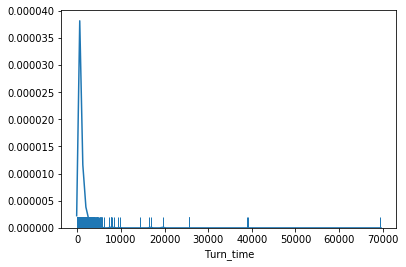

In [51]:
import seaborn as sns
sns.distplot(df1.Turn_time[(df1.Turn_time>0)], hist=False, rug=True);
#sns.distplot(df1.Turn_time[(df1.Entry_time == 1)&(df1.Turn_time>0)], hist=False, rug=True);

####  looks like there are some outliers lets examine thier rows

In [58]:
df1[df1.Turn_time>10000]

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,Entry_time,Turn_time,Next_Disp,Back_to_back
18593,2290139,E06,68523,Structure Fire,2000-08-16,2000-08-16,2000-08-16 12:44:15,2000-08-16 12:45:35,2000-08-16 12:46:02,2000-08-16 23:33:46,2000-08-17 00:42:28,NaT,NaT,Other,2000-08-17 04:25:33,CRISP AV/SPEAR AV,HP,94124,B10,25,6721,3,3,3,False,NaN,2,ENGINE,31,10,10,Bayview Hunters Point,"(37.7248615409237, -122.370213453144)",002290139-E06,2,38864.0,-1 days +14:20:22,1
29823,1480002,E19,44057,Structure Fire,2000-05-27,2000-05-26,2000-05-27 00:10:41,2000-05-27 00:10:49,2000-05-27 00:10:54,2000-05-27 05:37:30,2000-05-27 05:47:16,NaT,NaT,Other,2000-05-27 08:00:57,3000 Block of 25TH ST,SF,94110,B06,07,5533,3,3,3,True,NaN,3,ENGINE,33,6,9,Mission,"(37.7511731433127, -122.410367728863)",001480002-E19,1,19596.0,-1 days +21:49:35,1
31414,2290139,E22,68523,Structure Fire,2000-08-16,2000-08-16,2000-08-16 12:44:15,2000-08-16 12:45:35,2000-08-16 12:46:02,2000-08-16 23:37:12,2000-08-16 23:58:56,NaT,NaT,Other,2000-08-17 04:38:12,CRISP AV/SPEAR AV,HP,94124,B10,25,6721,3,3,3,True,NaN,2,ENGINE,30,10,10,Bayview Hunters Point,"(37.7248615409237, -122.370213453144)",002290139-E22,2,39070.0,-1 days +18:21:22,1
33060,2290139,E25,68523,Structure Fire,2000-08-16,2000-08-16,2000-08-16 12:44:15,2000-08-16 12:45:35,2000-08-16 12:46:02,2000-08-17 08:03:51,NaT,NaT,NaT,Other,2000-08-17 08:50:13,CRISP AV/SPEAR AV,HP,94124,B10,25,6721,3,3,3,False,NaN,2,ENGINE,32,10,10,Bayview Hunters Point,"(37.7248615409237, -122.370213453144)",002290139-E25,2,69469.0,-1 days +16:24:33,1
40769,2290139,E37,68523,Structure Fire,2000-08-16,2000-08-16,2000-08-16 12:44:15,2000-08-16 12:45:35,2000-08-16 12:46:02,2000-08-16 19:52:11,2000-08-16 20:20:02,NaT,NaT,Other,2000-08-17 00:31:52,CRISP AV/SPEAR AV,HP,94124,B10,25,6721,3,3,3,False,NaN,2,ENGINE,27,10,10,Bayview Hunters Point,"(37.7248615409237, -122.370213453144)",002290139-E37,2,25569.0,-1 days +21:13:43,1
46165,2290139,E44,68523,Structure Fire,2000-08-16,2000-08-16,2000-08-16 12:44:15,2000-08-16 12:45:35,2000-08-16 12:46:02,2000-08-16 19:54:40,2000-08-16 20:21:14,NaT,NaT,Other,2000-08-16 12:51:23,CRISP AV/SPEAR AV,HP,94124,B10,25,6721,3,3,3,False,NaN,2,ENGINE,29,10,10,Bayview Hunters Point,"(37.7248615409237, -122.370213453144)",002290139-E44,2,25718.0,02:45:16,0
54659,1110257,M07,33148,Other,2000-04-20,2000-04-20,2000-04-20 21:17:20,2000-04-20 21:20:00,2000-04-20 21:20:27,2000-04-21 01:53:06,2000-04-21 02:00:37,NaT,NaT,Other,2000-04-21 02:06:53,0 Block of CRESCENT AVE,SF,94110,B06,32,5632,3,3,3,True,NaN,1,MEDIC,3,6,9,Bernal Heights,"(37.7353420629754, -122.423688144703)",001110257-M07,3,16359.0,-1 days +21:37:26,1
94908,2040092,T09,61057,Structure Fire,2000-07-22,2000-07-22,2000-07-22 09:54:25,2000-07-22 09:54:47,2000-07-22 09:55:06,2000-07-22 13:54:40,2000-07-22 14:04:19,NaT,NaT,Other,2000-07-22 17:33:01,1600 Block of DONNER AVE,SF,94124,B10,17,6537,3,3,3,False,NaN,3,TRUCK,33,10,10,Bayview Hunters Point,"(37.7245000715362, -122.394310864255)",002040092-T09,2,14374.0,-1 days +21:24:44,1
94994,2290139,T09,68523,Structure Fire,2000-08-16,2000-08-16,2000-08-16 12:44:15,2000-08-16 12:45:35,2000-08-16 12:46:02,2000-08-16 19:51:02,2000-08-16 20:21:12,NaT,NaT,Other,2000-08-17 00:29:17,CRISP AV/SPEAR AV,HP,94124,B10,25,6721,3,3,3,True,NaN,2,TRUCK,28,10,10,Bayview Hunters Point,"(37.7248615409237, -122.370213453144)",002290139-T09,2,25500.0,-1 days +18:04:54,1
95784,1660446,T11,49747,Structure Fire,2000-06-14,2000-06-14,2000-06-14 17:55:34,2000-06-14 17:55:47,2000-06-14 17:55:57,2000-06-14 22:35:47,2000-06-14 18:1

### I notice that the Call Final Disposition column is 'Other' for all of these values.  Let's see what 'Other' looks like overall

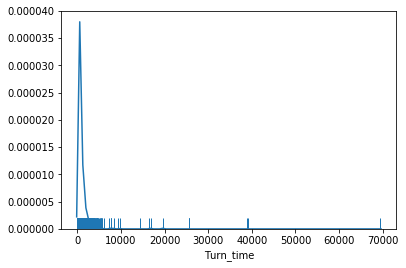

In [53]:
sns.distplot(df1.Turn_time[(df1['Call Final Disposition']=='Other')&(df1.Turn_time>0)], hist=False, rug=True);


### It could have something to do with the call beingfor a 'Stucture Fire'

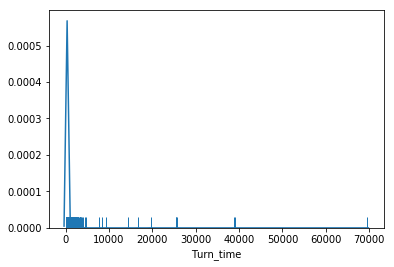

In [41]:
sns.distplot(df1.Turn_time[(df1['Call Type']=='Structure Fire')&(df1.Turn_time>0)], hist=False, rug=True);

### a quick look at turn time during the night

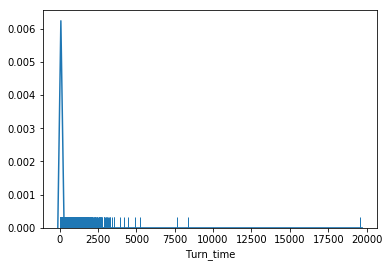

In [43]:
sns.distplot(df1.Turn_time[(df1.Entry_time == 1)&(df1.Turn_time>0)], hist=False, rug=True);

### turn time in morning

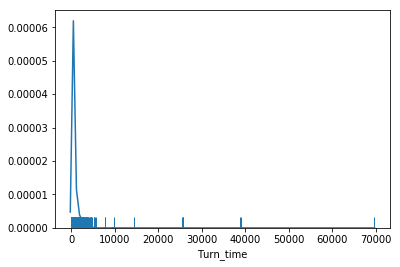

In [57]:
sns.distplot(df1.Turn_time[(df1.Entry_time == 2)&(df1.Turn_time>0)], hist=False, rug=True);

### turn time in afternoon

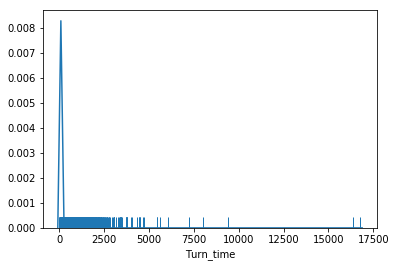

In [56]:
sns.distplot(df1.Turn_time[(df1.Entry_time == 3)&(df1.Turn_time>0)], hist=False, rug=True);

In [45]:
#row 40769 has a very large turn time.  It's unit is E37
#let's look more closely at the data associated with unit E37
#and see if we can figure out the large turn time

df1[df1['Unit ID']=='E37']

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,Entry_time_temp,Entry_time,Turn_time,Next_Disp,Back_to_back
40324,1040018,E37,30708,Medical Incident,2000-04-13,2000-04-12,2000-04-13 01:06:29,2000-04-13 01:09:42,2000-04-13 01:09:57,2000-04-13 01:12:05,NaT,NaT,NaT,Other,2000-04-13 01:21:39,900 Block of CONNECTICUT ST,SF,94107,B10,37,2615,3,3,3,True,NaN,1,ENGINE,3,10,10,Potrero Hill,"(37.7535461760596, -122.397211836423)",001040018-E37,01:09:42,1,128.0,NaT,0
40325,1040069,E37,30756,Structure Fire,2000-04-13,2000-04-13,2000-04-13 08:39:10,2000-04-13 08:39:12,2000-04-13 08:39:30,2000-04-13 08:40:38,2000-04-13 08:42:21,NaT,NaT,Other,2000-04-13 08:42:57,25TH ST/WISCONSIN ST,SF,94107,B10,37,2565,3,3,3,True,NaN,1,ENGINE,1,10,10,Potrero Hill,"(37.7521940654679, -122.398452381695)",001040069-E37,08:39:12,2,68.0,0 days 07:17:51,0
40326,1040114,E37,30800,Medical Incident,2000-04-13,2000-04-13,2000-04-13 11:36:36,2000-04-13 11:38:11,2000-04-13 11:38:26,2000-04-13 11:39:21,2000-04-13 11:41:39,NaT,NaT,Other,2000-04-13 11:46:40,900 Block of CONNECTICUT ST,SF,94107,B10,37,2615,3,3,3,True,NaN,1,ENGINE,1,10,10,Potrero Hill,"(37.7535461760596, -122.397211836423)",001040114-E37,11:38:11,2,55.0,0 days 02:55:29,0
40327,1040232,E37,30913,Vehicle Fire,2000-04-13,2000-04-13,2000-04-13 17:19:35,2000-04-13 17:20:26,2000-04-13 17:20:34,2000-04-13 17:21:58,2000-04-13 17:24:06,NaT,NaT,Other,2000-04-13 17:39:27,23RD ST/KANSAS ST,SF,94107,B10,37,2556,3,3,3,True,NaN,1,ENGINE,1,10,10,Potrero Hill,"(37.7545121210191, -122.402557510955)",001040232-E37,17:20:26,3,84.0,0 days 05:33:54,0
40328,1040275,E37,30953,Medical Incident,2000-04-13,2000-04-13,2000-04-13 20:25:08,2000-04-13 20:25:39,2000-04-13 20:25:54,2000-04-13 20:27:03,2000-04-13 20:29:41,NaT,NaT,Other,2000-04-13 20:33:59,700 Block of MISSOURI ST,SF,94107,B10,37,2566,3,3,3,True,NaN,1,ENGINE,1,10,10,Potrero Hill,"(37.7572927810101, -122.395771897062)",001040275-E37,20:25:39,3,69.0,0 days 02:46:27,0
40329,1040308,E37,30985,Medical Incident,2000-04-13,2000-04-13,2000-04-13 22:53:04,2000-04-13 22:53:26,2000-04-13 22:54:10,2000-04-13 22:56:00,2000-04-13 22:58:57,NaT,NaT,Other,2000-04-13 23:01:08,ARKANSAS ST/MARIPOSA ST,SF,94107,B03,37,2425,3,3,3,True,NaN,1,ENGINE,1,3,10,Potrero Hill,"(37.7637357276639, -122.398580416512)",001040308-E37,22:53:26,1,110.0,0 days 02:20:11,0
40330,1050076,E37,31072,Alarms,2000-04-14,2000-04-14,2000-04-14 09:15:04,2000-04-14 09:15:36,2000-04-14 09:15:58,2000-04-14 09:25:18,NaT,NaT,NaT,Other,2000-04-14 09:26:01,700 Block of 16TH ST,SF,94158,B03,29,2414,3,3,3,False,NaN,1,ENGINE,4,3,6,Potrero Hill,"(37.766563261577, -122.393855888214)",001050076-E37,09:15:36,2,560.0,0 days 10:14:50,0
40331,1050084,E37,31081,Alarms,2000-04-14,2000-04-14,2000-04-14 09:34:46,2000-04-14 09:35:12,2000-04-14 09:36:49,2000-04-14 09:42:27,2000-04-14 09:43:39,NaT,NaT,Other,2000-04-14 09:56:33,900 Block of INDIANA ST,SF,94107,B10,37,2535,3,3,3,False,NaN,1,ENGINE,1,10,10,Potrero Hill,"(37.7590606251144, -122.391364853933)",001050084-E37,09:35:12,2,338.0,0 days 00:10:48,0
40332,1050296,E37,31287,Structure Fire,2000-04-14,2000-04-14,2000-04-14 19:39:54,2000-04-14 19:44:50,2000-04-14 19:46:49,2000-04-14 19:47:53,2000-04-14 19:49:37,NaT,NaT,Other,2000-04-14 19:50:32,25TH ST/WISCONSIN ST,SF,94107,B10,37,2615,3,3,3,False,NaN,1,ENGINE,1,10,10,Potrero Hill,"(37.7521940654679, -122.398452381695)",001050296-E37,19:44:50,3,64.0,0 days 09:50:16,0
40333,1050345,E37,31335,Structure Fire,2000-04-14,2000-04-14,2000-04-14 21:29:54,2000-04-14 21:30:06,2000-04-14 21:30:16,2000-04-14 21:31:39,2000-04-14 21:3

In [59]:
#let's look at another
df1[df1['Unit ID']=='M07']

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,Entry_time,Turn_time,Next_Disp,Back_to_back
54579,1030113,M07,30621,Medical Incident,2000-04-12,2000-04-12,2000-04-12 21:25:14,2000-04-12 21:25:48,2000-04-12 21:26:15,2000-04-12 21:28:05,NaT,2000-04-12 21:43:38,2000-04-12 21:48:13,Other,2000-04-12 22:30:34,17TH ST/HARRISON ST,SF,94110,B02,07,5245,3,3,3,True,NaN,1,MEDIC,1,2,9,Mission,"(37.7640908631503, -122.413002684918)",001030113-M07,3,110.0,NaT,0
54580,1030158,M07,30665,Medical Incident,2000-04-12,2000-04-12,2000-04-12 23:01:25,2000-04-12 23:02:10,2000-04-12 23:02:51,2000-04-12 23:04:29,2000-04-12 23:08:07,2000-04-12 23:14:06,2000-04-12 23:22:30,Other,2000-04-12 23:33:27,3500 Block of 19TH ST,SF,94110,B06,07,5434,1,1,2,True,NaN,1,MEDIC,1,6,8,Mission,"(37.7600451698328, -122.423265598657)",001030158-M07,1,98.0,0 days 00:32:17,0
54581,1040036,M07,30726,Medical Incident,2000-04-13,2000-04-12,2000-04-13 02:56:52,2000-04-13 02:59:26,2000-04-13 03:01:03,2000-04-13 03:02:54,2000-04-13 03:09:45,NaT,NaT,Patient Declined Transport,2000-04-13 03:18:20,900 Block of GUERRERO ST,SF,94110,B06,11,5471,1,1,2,True,NaN,1,MEDIC,1,6,8,Mission,"(37.7563776481913, -122.423183995657)",001040036-M07,1,111.0,0 days 03:27:36,0
54582,1040038,M07,30728,Medical Incident,2000-04-13,2000-04-12,2000-04-13 03:48:25,2000-04-13 03:50:14,2000-04-13 03:50:48,2000-04-13 03:52:46,2000-04-13 03:59:52,2000-04-13 04:15:51,2000-04-13 04:28:17,Other,2000-04-13 04:44:42,300 Block of CUMBERLAND ST,SF,94114,B06,11,5452,3,3,3,True,NaN,1,MEDIC,2,6,8,Castro/Upper Market,"(37.7587533216954, -122.43130271352)",001040038-M07,1,118.0,0 days 00:32:28,0
54583,1040120,M07,30806,Medical Incident,2000-04-13,2000-04-13,2000-04-13 11:58:27,2000-04-13 12:00:27,2000-04-13 12:01:09,2000-04-13 12:03:01,2000-04-13 12:05:04,2000-04-13 12:36:11,2000-04-13 12:46:08,Other,2000-04-13 13:14:05,1800 Block of 15TH ST,SF,94103,B02,06,5227,3,3,3,True,NaN,1,MEDIC,2,2,8,Mission,"(37.7662536102334, -122.425864046062)",001040120-M07,2,112.0,0 days 07:16:27,0
54584,1040159,M07,30843,Medical Incident,2000-04-13,2000-04-13,2000-04-13 13:42:13,2000-04-13 13:43:47,2000-04-13 13:44:27,2000-04-13 13:46:34,2000-04-13 13:53:24,2000-04-13 14:08:04,2000-04-13 14:12:51,Other,2000-04-13 14:44:00,0 Block of TURK ST,SF,94102,B03,01,1365,3,3,3,True,NaN,1,MEDIC,1,3,6,Tenderloin,"(37.7833862379382, -122.409853729941)",001040159-M07,2,127.0,0 days 00:30:22,0
54585,1040173,M07,30858,Medical Incident,2000-04-13,2000-04-13,2000-04-13 14:14:22,2000-04-13 14:14:39,2000-04-13 14:22:23,2000-04-13 15:01:02,2000-04-13 15:12:38,2000-04-13 15:28:59,2000-04-13 15:43:47,Other,2000-04-13 16:12:42,0 Block of JONES ST,SF,94102,B03,01,1455,1,1,2,True,NaN,1,MEDIC,2,2,6,Tenderloin,"(37.7815955871561, -122.412190669917)",001040173-M07,3,2319.0,-1 days +23:38:23,1
54586,1040212,M07,30892,Medical Incident,2000-04-13,2000-04-13,2000-04-13 16:13:04,2000-04-13 16:13:55,2000-04-13 16:15:46,NaT,2000-04-13 16:17:48,2000-04-13 16:50:23,2000-04-13 16:50:42,Other,2000-04-13 17:13:15,1800 Block of 15TH ST,SF,94103,B02,06,5227,3,3,3,True,NaN,1,MEDIC,1,2,8,Mission,"(37.7662536102334, -122.425864046062)",001040212-M07,3,NaN,0 days 00:03:04,1
54587,1040242,M07,30923,Medical Incident,2000-04-13,2000-04-13,2000-04-13 18:13:44,2000-04-13 18:15:24,2000-04-13 18:19:42,NaT,2000-04-13 18:23:35,2000-04-13 18:37:14,2000-04-13 18:42:57,Other,2000-04-13 18:25:26,20TH ST/SHOTWELL ST,SF,94110,B06,07,5447,2,2,2,True,NaN,1,MEDIC,1,6,9,Mission,"(37.7588302329897, -122.41577930019)",001040242-M07,3,NaN,0 days 01:06:27,0
54588,1040256,M07,30935,Medic

#### if you look at the data, you can see that there are times when  the unit is dispatched before it is available.  I don't know if this means that the definition of turn time needs to be  modified before meaninfgul analysis of turn time vs time of day. This may an indicate that there are not enough units so turn time get huge.  

## See if evening incidences have slower turnout times
 
#### This is a calls for a null hypothesis test that compares two means.  To save time, I'm not going to check to see if the data is normally distributed (which means I could use a t-test).  I'm going to assume that data is non-parametric and use the Mann-Whitney U test


In [27]:

from scipy.stats import mannwhitneyu

# compare samples
stat, p = mannwhitneyu(df1['Turn_time'].loc[df1['Entry_time']<2], df1['Turn_time'].loc[df1['Entry_time']>1])
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=607911827.500, p=0.00000
Different distribution (reject H0)


In [18]:
import seaborn as sns

In [ ]:
g = sns.FacetGrid(df1, col='Turn_time', hue="Entry_time", palette="Set1")
g = (g.map(sns.distplot, "vals", hist=False, rug=True))

AttributeError: module 'matplotlib' has no attribute 'show'

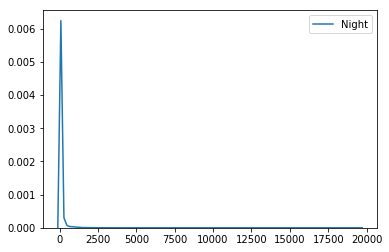

In [31]:
import numpy as np
%matplotlib inline
plt.style.use('seaborn-deep')
# this is to plot the kde
sns.kdeplot(df1.Turn_time[(df1.Entry_time == 1)&(df1.Turn_time>0)],label='Night');
sns.kdeplot(df1.Turn_time[(~df1.Entry_time == 1)&(df1.Turn_time>0)],label='Not Night');

# beautifying the labels
#plt.xlabel('value')
#plt.ylabel('density')
plt.show()